# Importamos las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Cargamos el dataset

In [2]:
df = pd.read_csv("C:/Users/mitev/Desktop/Prácticas/Almond_proyect/dataset/Almond.csv")

In [3]:
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [5]:
df_alm = df.copy()

In [6]:
df_alm.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df_alm.isnull().sum()

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [8]:
# Eliminamos las columnas que tengan demasiados valores nulos, el restante los rellenamos en este caso, con la media.
thresh = 0.4
cols = []

for col_ in df_alm.columns:
    per = df_alm[col_].isnull().sum() / len(df_alm)
    if per > thresh:
        print(f"{col_}\t{per}")
        cols.append(col_)
    else:
        if df_alm[col_].dtype.kind in {"f", "i"}: 
            df_alm[col_] = df_alm[col_].fillna(df_alm[col_].mean())

df_alm.drop(cols, axis=1, inplace=True)

Aspect Ratio	0.6418123439172315
Eccentricity	0.6418123439172315


In [9]:
df_alm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       2803 non-null   float64
 1   Width (minor axis)        2803 non-null   float64
 2   Thickness (depth)         2803 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 2803 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Extent                    2803 non-null   float64
 9   Convex hull(convex area)  2803 non-null   float64
 10  Type                      2803 non-null   object 
dtypes: float64(10), object(1)
memory usage: 241.0+ KB


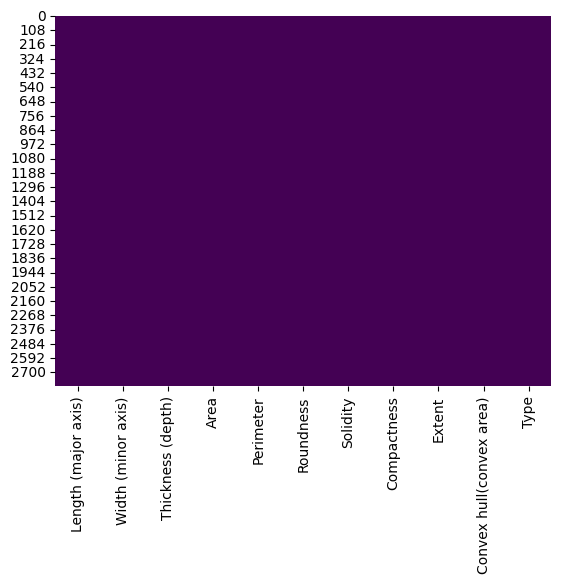

In [10]:
#Visualización de valores faltantes
sns.heatmap(df_alm.isnull(), cbar=False, cmap='viridis')
plt.show()

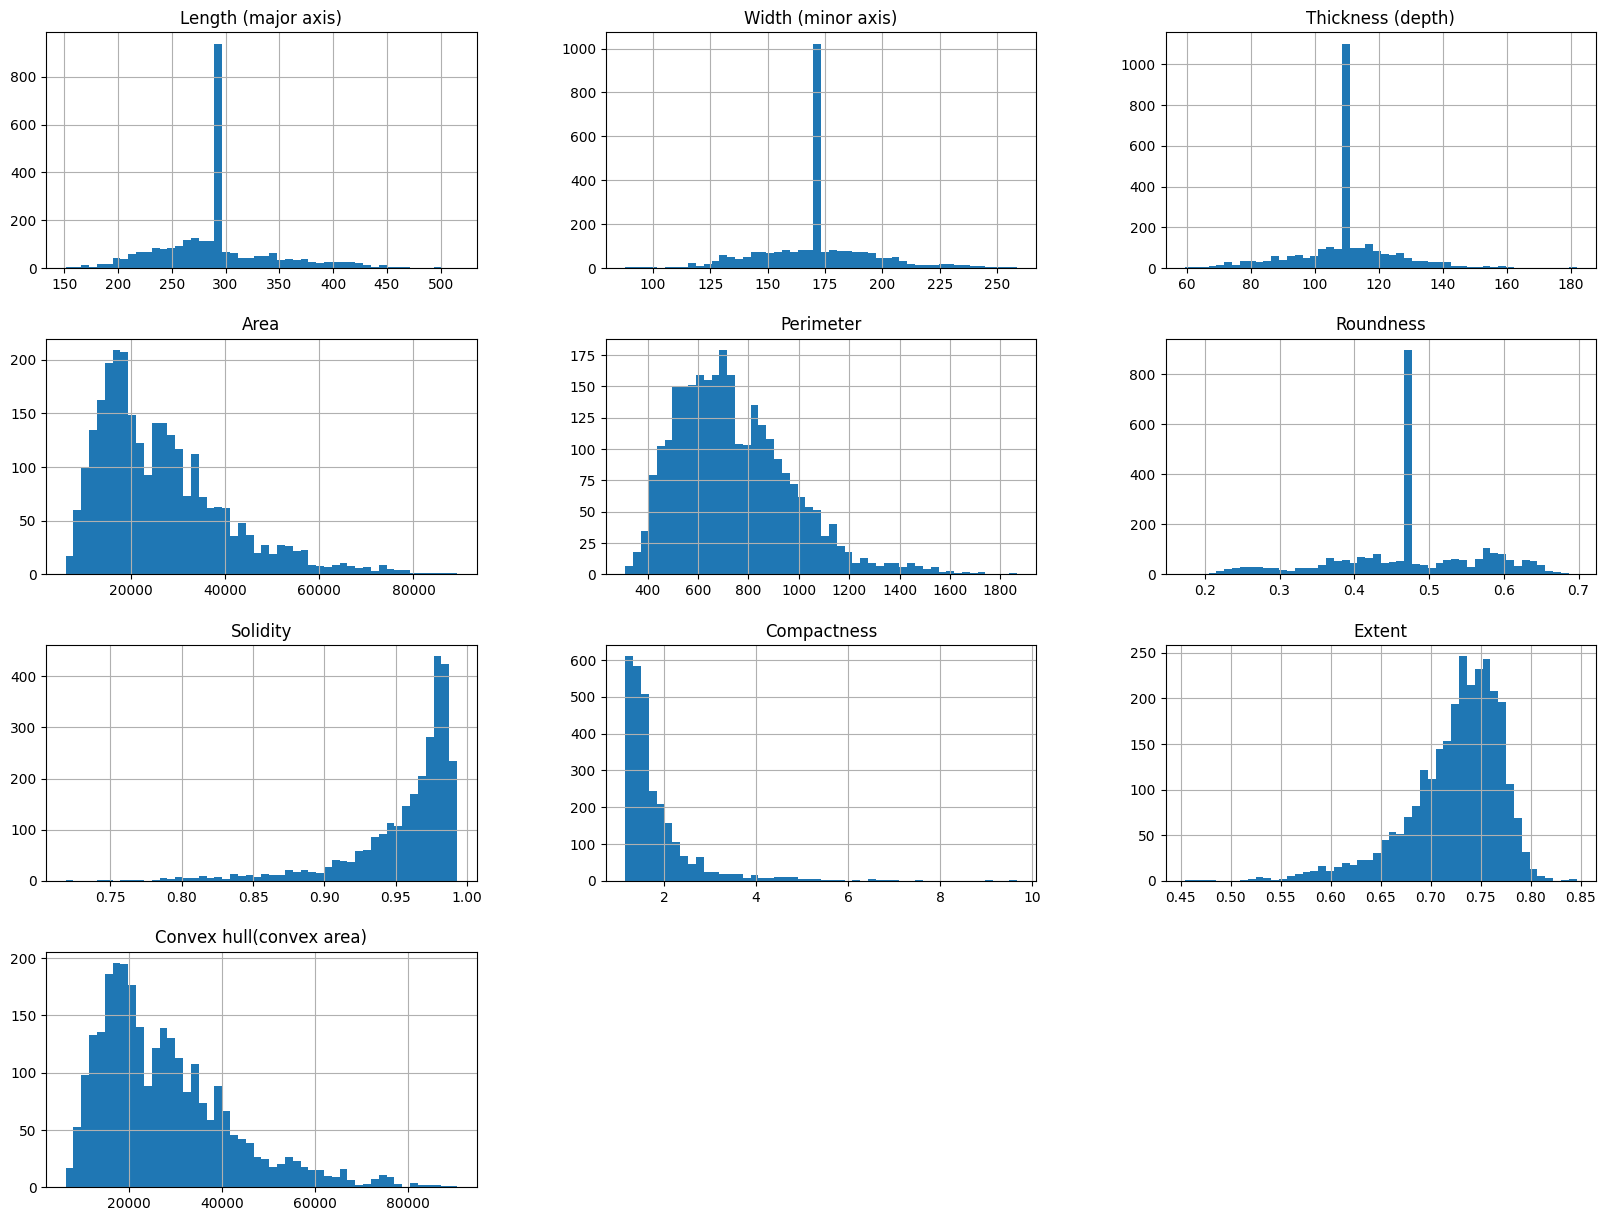

In [11]:
df_alm.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
df_alm['Type'].value_counts()

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

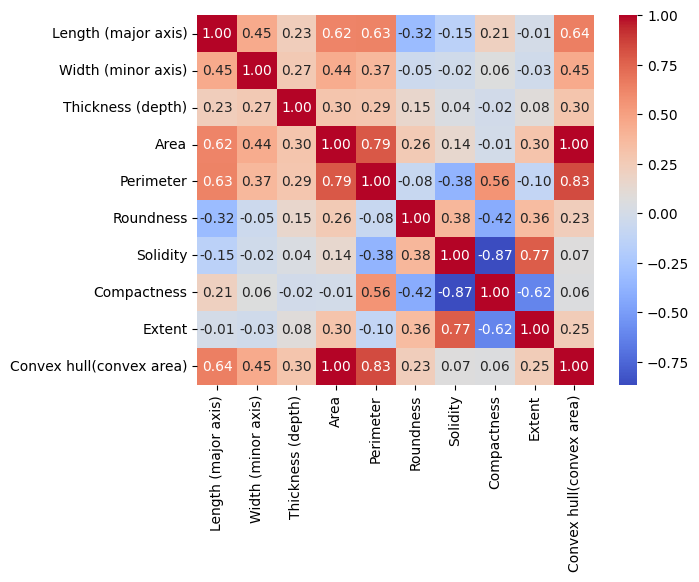

In [13]:
# Seleccionamos los valores numéricos, y dibujamos una gráfica de correlación. 
numeric_df = df_alm.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_alm.drop(['Type'], axis=1)), columns=df_alm.columns[:-1])
df_scaled['Type'] = df_alm['Type']

# Modelo

In [15]:
X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Confusion Matrix & Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[255  17  15]
 [ 12 224  42]
 [ 12  33 231]]
              precision    recall  f1-score   support

       MAMRA       0.91      0.89      0.90       287
     REGULAR       0.82      0.81      0.81       278
      SANORA       0.80      0.84      0.82       276

    accuracy                           0.84       841
   macro avg       0.84      0.84      0.84       841
weighted avg       0.85      0.84      0.84       841

